In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:

meg_sorted = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/2020_Villages_sorted.csv')
lum12_sorted = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/2011_Villages_sorted.csv')

ale20 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Gini_2020.csv')
ale2 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Gini_2011.csv')

In [3]:
lum12_sorted['sc_pop_share']=lum12_sorted['sc_pop']/lum12_sorted['population']
lum12_sorted['st_pop_share']=lum12_sorted['st_pop']/lum12_sorted['population']
meg_sorted['sc_pop_share'] = None
meg_sorted['st_pop_share'] = None

In [4]:
meg20 = pd.merge(meg_sorted,ale20, on=['state','district','subdistrict'],how='left')
meg20['year']=2020
lum11 = pd.merge(lum12_sorted,ale2, on=['state','district','subdistrict'],how='left')
lum11['year']=2011

# Handle duplicate column names by keeping the first occurrence
meg20 = meg20.loc[:, ~meg20.columns.duplicated()]

# Check for unique column names
if not meg20.columns.is_unique or not lum11.columns.is_unique:
    raise ValueError("One of the DataFrames has non-unique column names.")

# Find the common columns
common_columns = meg20.columns.intersection(lum11.columns)

# Subset both DataFrames to include only these common columns
meg20_common = meg20[common_columns]
lum11_common = lum11[common_columns]

# Concatenate the DataFrames
sync = pd.concat([meg20_common, lum11_common])
sync = sync.drop(columns={'Index',"Max_Len",'sum_y',
                          'numerator', 'num','alesina'},axis=1)
sync

,Village,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,sc_pop_share,st_pop_share,year
0,Subhashgram (RV),3348.0,1720.0,1628.0,1,0,0,0,0,0,0.0,0.0,1.0,1.0,1,1,0,1,0,1,1,3.517003,35.0,639.0,5919.0,645222.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Subhashgram (RV),645222.0,632.0,35.0,234477.0,SUBASHGRAM,5919.0,DIGLIPUR,6492.0,NaN,3.818813,1534.907491,26.135556,6.843895,0.007806,None,None,2020
1,Kalighat (RV),1636.0,837.0,799.0,1,0,0,1,0,0,1.0,0.0,1.0,1.0,1,1,1,1,0,1,1,16.843081,35.0,639.0,5919.0,645237.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Kalighat (RV),645237.0,632.0,35.0,234466.0,KALIGHAT,5919.0,DIGLIPUR,6492.0,NaN,4.637911,1534.907491,14.673333,3.163781,0.008969,None,None,2020
2,Madhupur (RV),3097.0,1664.0,1433.0,1,1,1,0,0,0,0.0,0.0,1.0,1.0,1,0,0,0,0,1,0,1.609613,35.0,639.0,5919.0,645218.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Madhupur (RV),645218.0,632.0,35.0,234470.0,MADHUPUR,5919.0,DIGLIPUR,6492.0,NaN,7.669943,1534.907491,29.957777,3.905867,0.009673,None,None,2020
3,Sitanagar (RV),2477.0,1271.0,1184.0,1,1,0,1,0,1,0.0,0.0,1.0,1.0,1,0,1,1,0,1,0,NaN,35.0,639.0,5919.0,645220.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Sitanagar (RV),645220.0,632.0,35.0,234476.0,SITANAGAR,5919.0,DIGLIPUR,6492.0,NaN,10.426155,1534.907491,28.177778,2.702605,0.011376,None,None,2020
4,Laxmipur (RV),1450.0,726.0,724.0,1,1,1,0,0,0,0.0,0.0,1.0,1.0,1,0,1,1,0,1,0,2.937917,35.0,639.0,5919.0,645216.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Laxmipur (RV),645216.0,632.0,35.0,234469.0,LAXMIPUR,5919.0,DIGLIPUR,6492.0,NaN,7.400439,1534.907491,20.591111,2.782417,0.014201,None,None,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460676,Kolyagara,162.0,77.0,85.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,NaN,19.0,340.0,2384,330507.0,WEST BENGAL,Purulia,Santuri,Kalaid,330507.0,321.0,19.0,111116.0,BALITORA,2384.0,SANTURI,3063.0,246.0,1.290310,216.977568,7.605714,5.894486,0.046949,0.0,0.993827,2011
460677,Trisuldanga,120.0,59.0,61.0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,NaN,19.0,340.0,2384,330551.0,WEST BENGAL,Purulia,Santuri,Malibana,330551.0,321.0,19.0,111121.0,TARABARI,2384.0,SANTURI,3063.0,246.0,2.005218,216.977568,5.644286,2.814800,0.047036,0.0,0.55,2011
460678,Sirisgora,213.0,111.0,102.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,19.0,340.0,2384,330522.0,WEST BENGAL,Purulia,Santuri,Dhuluri,330522.0,321.0,19.0,111119.0,RAMCHANDRAPUR-KOTALDI,2384.0,SANTURI,3063.0,246.0,1.218654,216.977568,14.190001,11.643994,0.066620,0.014085,0.483568,2011
460679,Mujadih,624.0,325.0,299.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,19.0,340.0,2384,330488.0,WEST BENGAL,Purulia,Santuri,Bakuliashota,330488.0,321.0,19.0,111116.0,BALITORA,2384.0,SANTURI,3063.0,246.0,2.323675,216.977568,62.277140,26.801139,0.099803,0.399038,0.310897,2011


In [5]:
def fill_with_group_values(series):
    return series.fillna(method='ffill').fillna(method='bfill')

# Apply the function using transform for both columns
sync['sc_pop_share'] = sync.groupby('vil_code')['sc_pop_share'].transform(fill_with_group_values)
sync['st_pop_share'] = sync.groupby('vil_code')['st_pop_share'].transform(fill_with_group_values)
# sync

In [6]:
# Group by the specified columns
# grouped = sync.groupby(['state', 'district', 'subdistrict', 'vil_code', 'Village'])
grouped = sync.groupby(['vil_code'])

# Filter groups that contain both years 2011 and 2020
filtered_sync = grouped.filter(lambda x: set(x['year']) >= {2011, 2020})

# Sort the resulting DataFrame
# sorted_sync = filtered_sync.sort_values(by=['state', 'district', 'subdistrict', 'vil_code', 'Village', 'year'])
filtered_sync_20 = filtered_sync[filtered_sync['year']==2020]
filtered_sync_11 = filtered_sync[filtered_sync['year']==2011]

print(len(filtered_sync))
print(len(filtered_sync_20))
print(len(filtered_sync_11))

909653
454806
454847


In [7]:
towns_20 = filtered_sync_20[filtered_sync_20['population']>=5000] 
vills_20 = filtered_sync_20[filtered_sync_20['population']<5000] 

towns_11 = filtered_sync_11[filtered_sync_11['population']>=5000] 
vills_11 = filtered_sync_11[filtered_sync_11['population']<5000] 


In [8]:
tt = pd.concat([towns_11,towns_20])
vv = pd.concat([vills_11,vills_20])


state_stats1 = tt.groupby(['state','year']).mean()
state_stats2 = vv.groupby(['state','year']).mean()

# state_stats2
# state_stats1

In [9]:
towns_20_sorted = towns_20.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
towns_20_sorted['Index'] = towns_20_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
towns_20_sorted['Max_Len'] = towns_20_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')
towns_20_sorted = towns_20_sorted[towns_20_sorted['population'] != 0]

vills_20_sorted = vills_20.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
vills_20_sorted['Index'] = vills_20_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
vills_20_sorted['Max_Len'] = vills_20_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')
vills_20_sorted = vills_20_sorted[vills_20_sorted['population'] != 0]

towns_11_sorted = towns_11.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
towns_11_sorted['Index'] = towns_11_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
towns_11_sorted['Max_Len'] = towns_11_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')
towns_11_sorted = towns_11_sorted[towns_11_sorted['population'] != 0]

vills_11_sorted = vills_11.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
vills_11_sorted['Index'] = vills_11_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
vills_11_sorted['Max_Len'] = vills_11_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')
vills_11_sorted = vills_11_sorted[vills_11_sorted['population'] != 0]


print(len(towns_20_sorted))
print(len(vills_20_sorted))
print(len(towns_11_sorted))
print(len(vills_11_sorted))

27657
427149
19612
435235


In [10]:
towns_20_codes = towns_20_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
towns_20_codes=towns_20_codes.drop_duplicates(subset=['state','district','subdistrict',])

vills_20_codes = vills_20_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
vills_20_codes=vills_20_codes.drop_duplicates(subset=['state','district','subdistrict',])

towns_11_codes = towns_11_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
towns_11_codes=towns_11_codes.drop_duplicates(subset=['state','district','subdistrict',])

vills_11_codes = vills_11_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
vills_11_codes=vills_11_codes.drop_duplicates(subset=['state','district','subdistrict',])

In [19]:
towns_20_sub = towns_20_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum',
                                                                               'mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean'
                                                                               }).reset_index()

towns_20_sub['subdist_ntl_pc']=towns_20_sub['avg_ntl']/towns_20_sub['population']


vills_20_sub = vills_20_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum',
                                                                               'mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean'
                                                                               }).reset_index()

vills_20_sub['subdist_ntl_pc']=vills_20_sub['avg_ntl']/vills_20_sub['population']


towns_11_sub = towns_11_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum',
                                                                               'mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean'
                                                                               }).reset_index()

towns_11_sub['subdist_ntl_pc']=towns_11_sub['avg_ntl']/towns_11_sub['population']


vills_11_sub = vills_11_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum',
                                                                               'mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean'
                                                                               }).reset_index()

vills_11_sub['subdist_ntl_pc']=vills_11_sub['avg_ntl']/vills_11_sub['population']

In [20]:
weighted_means1 = towns_20_sorted.groupby(['state', 'district', 'subdistrict']).apply(
    lambda x: pd.Series({
        'sc_pop_share': (x['sc_pop_share'] * x['population']).sum() / x['population'].sum(),
        'st_pop_share': (x['st_pop_share'] * x['population']).sum() / x['population'].sum()
    })
).reset_index()
towns_20_sub = pd.merge(towns_20_sub, weighted_means1, on=['state', 'district', 'subdistrict'])


weighted_means2 = vills_20_sorted.groupby(['state', 'district', 'subdistrict']).apply(
    lambda x: pd.Series({
        'sc_pop_share': (x['sc_pop_share'] * x['population']).sum() / x['population'].sum(),
        'st_pop_share': (x['st_pop_share'] * x['population']).sum() / x['population'].sum()
    })
).reset_index()
vills_20_sub = pd.merge(vills_20_sub, weighted_means2, on=['state', 'district', 'subdistrict'])


weighted_means3 = towns_11_sorted.groupby(['state', 'district', 'subdistrict']).apply(
    lambda x: pd.Series({
        'sc_pop_share': (x['sc_pop_share'] * x['population']).sum() / x['population'].sum(),
        'st_pop_share': (x['st_pop_share'] * x['population']).sum() / x['population'].sum()
    })
).reset_index()
towns_11_sub = pd.merge(towns_11_sub, weighted_means3, on=['state', 'district', 'subdistrict'])


weighted_means4 = vills_11_sorted.groupby(['state', 'district', 'subdistrict']).apply(
    lambda x: pd.Series({
        'sc_pop_share': (x['sc_pop_share'] * x['population']).sum() / x['population'].sum(),
        'st_pop_share': (x['st_pop_share'] * x['population']).sum() / x['population'].sum()
    })
).reset_index()
vills_11_sub = pd.merge(vills_11_sub, weighted_means4, on=['state', 'district', 'subdistrict'])

In [21]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

In [22]:
ale20_towns = towns_20_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
ale20_towns.columns = ['state','district',
               'subdistrict',

               'sum_y','numerator', 'num','alesina']

ale20_vills = vills_20_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
ale20_vills.columns = ['state','district',
               'subdistrict',

               'sum_y','numerator', 'num','alesina']

ale11_towns = towns_11_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
ale11_towns.columns = ['state','district',
               'subdistrict',

               'sum_y','numerator', 'num','alesina']

ale11_vills = vills_11_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
ale11_vills.columns = ['state','district',
               'subdistrict',

               'sum_y','numerator', 'num','alesina']

In [23]:
prem_t20 = pd.merge(towns_20_sub, ale20_towns, on=['state','district','subdistrict'],how='left')
towns20 = pd.merge(prem_t20, towns_20_codes, on=['state','district','subdistrict'],how='inner')
towns20['year']=2020

prem_v20 = pd.merge(vills_20_sub, ale20_vills, on=['state','district','subdistrict'],how='left')
vills20 = pd.merge(prem_v20, vills_20_codes, on=['state','district','subdistrict'],how='inner')
vills20['year']=2020

prem_t11 = pd.merge(towns_11_sub, ale11_towns, on=['state','district','subdistrict'],how='left')
towns11 = pd.merge(prem_t11, towns_11_codes, on=['state','district','subdistrict'],how='inner')
towns11['year']=2011

prem_v11 = pd.merge(vills_11_sub, ale11_vills, on=['state','district','subdistrict'],how='left')
vills11 = pd.merge(prem_v11, vills_11_codes, on=['state','district','subdistrict'],how='inner')
vills11['year']=2011


In [27]:
towns=pd.concat([towns11,towns20])
villages=pd.concat([vills11,vills20])

In [28]:
# Create the 'period' column based on the 'year' column
towns['period'] = np.where(towns['year'] == 2011, 0, 
                                    np.where(towns['year'] == 2020, 1, np.nan))

# If you want to drop rows where 'year' is not 2011 or 2020
towns.dropna(subset=['period'], inplace=True)

pivot_df = towns.pivot(index=['state','district','subdistrict'], columns='year', values=['mcwc','num']).reset_index()

# Rename columns for clarity
pivot_df.columns = ['state','district','subdistrict', 'mcwc_2011', 'mcwc_2020','num_2011','num_2020']

# Create the 'treated' column based on the comparison of mcwc values
pivot_df['treated'] = np.where(pivot_df['mcwc_2011'] > pivot_df['mcwc_2020'], 0, 1)
pivot_df['mcwc_dens_2011']=pivot_df['mcwc_2011']/pivot_df['num_2011']
pivot_df['mcwc_dens_2020']=pivot_df['mcwc_2020']/pivot_df['num_2020']
pivot_df['intensity']=pivot_df['mcwc_2020']-pivot_df['mcwc_2011']

# Adjust intensity based on the conditions
pivot_df['intensity'] = pivot_df.apply(
    lambda row: 0 if row['intensity'] < 0 or row['mcwc_2011'] == row['mcwc_2020'] else row['intensity'], 
    axis=1
)

# Drop duplicates to avoid issues in the merge step
# dissorted_sync = dissorted_sync.drop_duplicates(subset=['vil_code', 'year'])

# Merge the treated column back to the original DataFrame
towns = pd.merge(towns, pivot_df[['state','district','subdistrict', 'treated','intensity','mcwc_dens_2020','mcwc_dens_2011']]
                                , on=['state','district','subdistrict'], how='left')

In [31]:
# Create the 'period' column based on the 'year' column
villages['period'] = np.where(villages['year'] == 2011, 0, 
                                    np.where(villages['year'] == 2020, 1, np.nan))

# If you want to drop rows where 'year' is not 2011 or 2020
villages.dropna(subset=['period'], inplace=True)

pivot_df = villages.pivot(index=['state','district','subdistrict'], columns='year', values=['mcwc','num']).reset_index()

# Rename columns for clarity
pivot_df.columns = ['state','district','subdistrict', 'mcwc_2011', 'mcwc_2020','num_2011','num_2020']

# Create the 'treated' column based on the comparison of mcwc values
pivot_df['treated'] = np.where(pivot_df['mcwc_2011'] > pivot_df['mcwc_2020'], 0, 1)
pivot_df['mcwc_dens_2011']=pivot_df['mcwc_2011']/pivot_df['num_2011']
pivot_df['mcwc_dens_2020']=pivot_df['mcwc_2020']/pivot_df['num_2020']
pivot_df['intensity']=pivot_df['mcwc_2020']-pivot_df['mcwc_2011']

# Adjust intensity based on the conditions
pivot_df['intensity'] = pivot_df.apply(
    lambda row: 0 if row['intensity'] < 0 or row['mcwc_2011'] == row['mcwc_2020'] else row['intensity'], 
    axis=1
)

# Drop duplicates to avoid issues in the merge step
# dissorted_sync = dissorted_sync.drop_duplicates(subset=['vil_code', 'year'])

# Merge the treated column back to the original DataFrame
villages = pd.merge(villages, pivot_df[['state','district','subdistrict', 'treated','intensity','mcwc_dens_2020','mcwc_dens_2011']]
                                , on=['state','district','subdistrict'], how='left')

In [34]:

# Mapping of states to zones
state_to_zone = {
    'ANDHRA PRADESH': 'A',
    'ASSAM': 'B',
    'BIHAR': 'B',
    'CHHATTISGARH': 'B',
    'GOA': 'A',
    'GUJARAT': 'A',
    'HARYANA': 'B',
    'JHARKHAND': 'B',
    'KARNATAKA': 'A',
    'KERALA': 'A',
    'MADHYA PRADESH': 'B',
    'MAHARASHTRA': 'A',
    'ODISHA': 'B',
    'PUNJAB': 'B',
    'RAJASTHAN': 'B',
    'TAMIL NADU': 'A',
    'TELANGANA': 'A',
    'UTTAR PRADESH': 'B',
    'UTTARAKHAND': 'B',
    'WEST BENGAL': 'B'
}

towns['Region'] = towns['state'].map(state_to_zone)
villages['Region'] = villages['state'].map(state_to_zone)


towns['no_1000s'] = towns['population']/1000

towns['edu']= towns['p_school']+towns['m_school']+towns['h_school']+\
             towns['ssc_school']+towns['arts_and_science_degree_college']+towns['iti']
towns['edu_per_1000']= towns['edu']/towns['no_1000s']
towns['p_sch_per_1000']= towns['p_school']/towns['no_1000s']
towns['m_sch_per_1000']= towns['m_school']/towns['no_1000s']
towns['h_sch_per_1000']= towns['h_school']/towns['no_1000s']
towns['ssc_sch_per_1000']= towns['ssc_school']/towns['no_1000s']
towns['col_per_1000']= towns['arts_and_science_degree_college']/towns['no_1000s']
towns['iti_per_1000']= towns['iti']/towns['no_1000s']


towns['med'] = towns['phc']+towns['mcwc']+towns['dispensary']+\
              towns['veterinary_hospital']+towns['aanganwadi']
towns['med_per_1000'] = towns['med']+towns['no_1000s']
towns['phc_per_1000']= towns['phc']/towns['no_1000s']
towns['mcwc_per_1000']= towns['mcwc']/towns['no_1000s']
towns['dis_per_1000']= towns['dispensary']/towns['no_1000s']
towns['vet_per_1000']= towns['veterinary_hospital']/towns['no_1000s']
towns['aanganwadi_per_1000']= towns['aanganwadi']/towns['no_1000s']

towns['adm'] = towns['cooperative_bank']+towns['post_office']+towns['mandis']
towns['adm_per_1000'] = towns['adm']+towns['no_1000s']
towns['bank_per_1000']= towns['cooperative_bank']/towns['no_1000s']
towns['po_per_1000']= towns['post_office']/towns['no_1000s']
towns['mandi_per_1000']= towns['mandis']/towns['no_1000s']


towns['share_roads'] = towns['all_weather_road']/towns['num']
towns['share_rails'] = towns['railway']/towns['num']
towns['share_pubtn'] = towns['bus']/towns['num']
towns['unique_id'] = towns['state'] + '_' + towns['district'] + '_' + towns['subdistrict']


villages['no_1000s'] = villages['population']/1000

villages['edu']= villages['p_school']+villages['m_school']+villages['h_school']+\
             villages['ssc_school']+villages['arts_and_science_degree_college']+villages['iti']
villages['edu_per_1000']= villages['edu']/villages['no_1000s']
villages['p_sch_per_1000']= villages['p_school']/villages['no_1000s']
villages['m_sch_per_1000']= villages['m_school']/villages['no_1000s']
villages['h_sch_per_1000']= villages['h_school']/villages['no_1000s']
villages['ssc_sch_per_1000']= villages['ssc_school']/villages['no_1000s']
villages['col_per_1000']= villages['arts_and_science_degree_college']/villages['no_1000s']
villages['iti_per_1000']= villages['iti']/villages['no_1000s']


villages['med'] = villages['phc']+villages['mcwc']+villages['dispensary']+\
              villages['veterinary_hospital']+villages['aanganwadi']
villages['med_per_1000'] = villages['med']+villages['no_1000s']
villages['phc_per_1000']= villages['phc']/villages['no_1000s']
villages['mcwc_per_1000']= villages['mcwc']/villages['no_1000s']
villages['dis_per_1000']= villages['dispensary']/villages['no_1000s']
villages['vet_per_1000']= villages['veterinary_hospital']/villages['no_1000s']
villages['aanganwadi_per_1000']= villages['aanganwadi']/villages['no_1000s']

villages['adm'] = villages['cooperative_bank']+villages['post_office']+villages['mandis']
villages['adm_per_1000'] = villages['adm']+villages['no_1000s']
villages['bank_per_1000']= villages['cooperative_bank']/villages['no_1000s']
villages['po_per_1000']= villages['post_office']/villages['no_1000s']
villages['mandi_per_1000']= villages['mandis']/villages['no_1000s']


villages['share_roads'] = villages['all_weather_road']/villages['num']
villages['share_rails'] = villages['railway']/villages['num']
villages['share_pubtn'] = villages['bus']/villages['num']

villages['unique_id'] = villages['state'] + '_' + villages['district'] + '_' + villages['subdistrict']


In [35]:
towns.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/towns.csv',index=False)
villages.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/villages.csv',index=False)

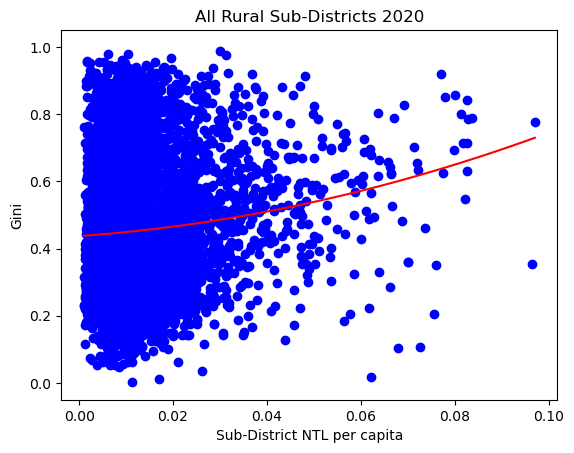

In [ ]:

ale = vills11.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.1]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(-0.02,0.6)
plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

### Change

In [39]:
dis_sync_town = towns.copy()

# List of variables to calculate differences for
variables = ['population', 'male_pop', 'female_pop', 'p_school', 'm_school', 'h_school',
             'ssc_school', 'arts_and_science_degree_college', 'iti', 'phc', 'mcwc',
             'dispensary', 'veterinary_hospital', 'aanganwadi', 'post_office', 'bus',
             'railway', 'all_weather_road', 'cooperative_bank', 'mandis', 'nearest_town_distance',
             'village_area_sqkm', 'SubDistrict Area', 'avg_ntl', 'ntl_pa', 'ntl_pc',
             'sum_y', 'numerator', 'num', 'alesina', 'no_1000s', 
             'edu', 'med','adm',
            #  'edu_per_1000', 'p_sch_per_1000', 'm_sch_per_1000', 'h_sch_per_1000',
            #  'ssc_sch_per_1000', 'col_per_1000', 'iti_per_1000',  'med_per_1000',
            #  'phc_per_1000', 'mcwc_per_1000', 'dis_per_1000', 'vet_per_1000', 'aanganwadi_per_1000',
            #  'adm_per_1000', 'bank_per_1000', 'po_per_1000', 'mandi_per_1000',
             'share_roads', 'share_rails', 'share_pubtn']

# Calculate differences for each variable
for var in variables:
    # Pivot the data to wide format to easily calculate differences
    pivot_df = dis_sync_town.pivot(index=['state', 'district', 'subdistrict'], columns='year', values=var).reset_index()
    pivot_df.columns = [str(col) if not isinstance(col, str) else col for col in pivot_df.columns]
    pivot_df[f'{var}_change'] = pivot_df['2020'] - pivot_df['2011']
    pivot_df = pivot_df.drop(columns=['2011', '2020'])
    
    # Merge back to the original DataFrame
    dis_sync_town = pd.merge(dis_sync_town, pivot_df, on=['state', 'district', 'subdistrict'])

dis_sync_town=dis_sync_town.drop_duplicates(subset=['state','district','subdistrict',])


dis_sync_town = dis_sync_town.drop(columns={'year','no_1000s_change','village_area_sqkm_change','SubDistrict Area_change',
                                    'p_school', 'm_school', 'h_school',
                                    'ssc_school', 'arts_and_science_degree_college', 'iti', 'phc', 'mcwc',
                                    'dispensary', 'veterinary_hospital', 'aanganwadi', 'post_office', 'bus',
                                    'railway', 'all_weather_road', 'cooperative_bank', 'mandis', 'nearest_town_distance',
                                    'village_area_sqkm', 'avg_ntl', 'ntl_pa', 'ntl_pc',
                                    'sum_y', 'numerator', 'num', 'alesina', 'no_1000s','share_roads', 
                                    'share_rails', 'share_pubtn',
                                    'edu_per_1000', 'p_sch_per_1000', 'm_sch_per_1000', 'h_sch_per_1000', 
                                    'ssc_sch_per_1000', 'col_per_1000', 'iti_per_1000','med_per_1000', 
                                    'phc_per_1000', 'mcwc_per_1000', 'dis_per_1000', 'vet_per_1000', 
                                    'aanganwadi_per_1000', 'adm_per_1000', 'bank_per_1000', 'po_per_1000', 
                                    'mandi_per_1000'
                                  },axis=1)


In [40]:
dis_sync = villages.copy()

# List of variables to calculate differences for
variables = ['population', 'male_pop', 'female_pop', 'p_school', 'm_school', 'h_school',
             'ssc_school', 'arts_and_science_degree_college', 'iti', 'phc', 'mcwc',
             'dispensary', 'veterinary_hospital', 'aanganwadi', 'post_office', 'bus',
             'railway', 'all_weather_road', 'cooperative_bank', 'mandis', 'nearest_town_distance',
             'village_area_sqkm', 'SubDistrict Area', 'avg_ntl', 'ntl_pa', 'ntl_pc',
             'sum_y', 'numerator', 'num', 'alesina', 'no_1000s', 
             'edu', 'med','adm',
            #  'edu_per_1000', 'p_sch_per_1000', 'm_sch_per_1000', 'h_sch_per_1000',
            #  'ssc_sch_per_1000', 'col_per_1000', 'iti_per_1000',  'med_per_1000',
            #  'phc_per_1000', 'mcwc_per_1000', 'dis_per_1000', 'vet_per_1000', 'aanganwadi_per_1000',
            #  'adm_per_1000', 'bank_per_1000', 'po_per_1000', 'mandi_per_1000',
             'share_roads', 'share_rails', 'share_pubtn']

# Calculate differences for each variable
for var in variables:
    # Pivot the data to wide format to easily calculate differences
    pivot_df = dis_sync.pivot(index=['state', 'district', 'subdistrict'], columns='year', values=var).reset_index()
    pivot_df.columns = [str(col) if not isinstance(col, str) else col for col in pivot_df.columns]
    pivot_df[f'{var}_change'] = pivot_df['2020'] - pivot_df['2011']
    pivot_df = pivot_df.drop(columns=['2011', '2020'])
    
    # Merge back to the original DataFrame
    dis_sync = pd.merge(dis_sync, pivot_df, on=['state', 'district', 'subdistrict'])

dis_sync=dis_sync.drop_duplicates(subset=['state','district','subdistrict',])


dis_sync = dis_sync.drop(columns={'year','no_1000s_change','village_area_sqkm_change','SubDistrict Area_change',
                                    'p_school', 'm_school', 'h_school',
                                    'ssc_school', 'arts_and_science_degree_college', 'iti', 'phc', 'mcwc',
                                    'dispensary', 'veterinary_hospital', 'aanganwadi', 'post_office', 'bus',
                                    'railway', 'all_weather_road', 'cooperative_bank', 'mandis', 'nearest_town_distance',
                                    'village_area_sqkm', 'avg_ntl', 'ntl_pa', 'ntl_pc',
                                    'sum_y', 'numerator', 'num', 'alesina', 'no_1000s','share_roads', 
                                    'share_rails', 'share_pubtn',
                                    'edu_per_1000', 'p_sch_per_1000', 'm_sch_per_1000', 'h_sch_per_1000', 
                                    'ssc_sch_per_1000', 'col_per_1000', 'iti_per_1000','med_per_1000', 
                                    'phc_per_1000', 'mcwc_per_1000', 'dis_per_1000', 'vet_per_1000', 
                                    'aanganwadi_per_1000', 'adm_per_1000', 'bank_per_1000', 'po_per_1000', 
                                    'mandi_per_1000'
                                  },axis=1)

In [41]:
dis_sync.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel_villages_change.csv',index=False)
dis_sync_town.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel_towns_change.csv',index=False)

# Village level Treatments

In [ ]:
prem_t20 = pd.merge(towns_20_sorted, ale20_towns, on=['state','district','subdistrict'],how='left')
towns20 = pd.merge(prem_t20, towns_20_codes, on=['state','district','subdistrict'],how='inner')
towns20['year']=2020

prem_v20 = pd.merge(vills_20_sorted, ale20_vills, on=['state','district','subdistrict'],how='left')
vills20 = pd.merge(prem_v20, vills_20_codes, on=['state','district','subdistrict'],how='inner')
vills20['year']=2020

prem_t11 = pd.merge(towns_11_sorted, ale11_towns, on=['state','district','subdistrict'],how='left')
towns11 = pd.merge(prem_t11, towns_11_codes, on=['state','district','subdistrict'],how='inner')
towns11['year']=2011

prem_v11 = pd.merge(vills_11_sorted, ale11_vills, on=['state','district','subdistrict'],how='left')
vills11 = pd.merge(prem_v11, vills_11_codes, on=['state','district','subdistrict'],how='inner')
vills11['year']=2011

In [ ]:
towns=pd.concat([towns11,towns20])
villages=pd.concat([vills11,vills20])

towns_test = towns.drop_duplicates(subset=['vil_code', 'year'])
village_test = villages.drop_duplicates(subset=['vil_code', 'year'])

# Define a function to fill None values using transform
def fill_with_group_values(series):
    return series.fillna(method='ffill').fillna(method='bfill')

# Apply the function using transform for both columns
village_test['nearest_town_distance'] = village_test.groupby('vil_code')['nearest_town_distance'].transform(fill_with_group_values)


In [ ]:
len((village_test['vil_code']).unique())

437551

In [ ]:
village_test['edu']= village_test['p_school']+village_test['m_school']+village_test['h_school']+\
             village_test['ssc_school']+village_test['arts_and_science_degree_college']+village_test['iti']

village_test['med'] = village_test['phc']+village_test['mcwc']+village_test['dispensary']+\
              village_test['veterinary_hospital']+village_test['aanganwadi']

village_test['adm'] = village_test['cooperative_bank']+village_test['post_office']+village_test['mandis']

village_test['unique_id'] = village_test['state'] + '_' + village_test['district'] + '_' + village_test['subdistrict'] + '_' + village_test['subdistrict']



towns_test['edu']= towns_test['p_school']+towns_test['m_school']+towns_test['h_school']+\
             towns_test['ssc_school']+towns_test['arts_and_science_degree_college']+towns_test['iti']

towns_test['med'] = towns_test['phc']+towns_test['mcwc']+towns_test['dispensary']+\
              towns_test['veterinary_hospital']+towns_test['aanganwadi']

towns_test['adm'] = towns_test['cooperative_bank']+towns_test['post_office']+towns_test['mandis']

towns_test['unique_id'] = towns_test['state'] + '_' + towns_test['district'] + '_' + towns_test['subdistrict'] + '_' + towns_test['subdistrict']



In [ ]:
towns_test.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/towns_test.csv',index=False)
village_test.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/villages_test.csv',index=False)